In [183]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [126]:
print(f'train shape : {train.shape}')
print(f'test shape : {test.shape}')

train shape : (26457, 20)
test shape : (10000, 19)


In [127]:
cols = ['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month']
train.drop_duplicates(cols, inplace=True)

In [128]:
print(f'train shape : {train.shape}')

train shape : (24104, 20)


In [129]:
train['DAYS_BIRTH'] = - round(train['DAYS_BIRTH'] / 365)

test['DAYS_BIRTH'] = - round(test['DAYS_BIRTH'] / 365)

In [130]:
train['DAYS_EMPLOYED'] = - (train['DAYS_EMPLOYED'] / 365)
train.loc[train['DAYS_EMPLOYED'] < 0, 'DAYS_EMPLOYED'] = 0

test['DAYS_EMPLOYED'] = - (test['DAYS_EMPLOYED'] / 365)
test.loc[test['DAYS_EMPLOYED'] < 0, 'DAYS_EMPLOYED'] = 0

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24104 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          24104 non-null  int64  
 1   gender         24104 non-null  object 
 2   car            24104 non-null  object 
 3   reality        24104 non-null  object 
 4   child_num      24104 non-null  int64  
 5   income_total   24104 non-null  float64
 6   income_type    24104 non-null  object 
 7   edu_type       24104 non-null  object 
 8   family_type    24104 non-null  object 
 9   house_type     24104 non-null  object 
 10  DAYS_BIRTH     24104 non-null  float64
 11  DAYS_EMPLOYED  24104 non-null  float64
 12  FLAG_MOBIL     24104 non-null  int64  
 13  work_phone     24104 non-null  int64  
 14  phone          24104 non-null  int64  
 15  email          24104 non-null  int64  
 16  occyp_type     16685 non-null  object 
 17  family_size    24104 non-null  float64
 18  begin_

In [118]:
train['credit'].value_counts() / len(train)

2.0    0.644997
1.0    0.236143
0.0    0.118860
Name: credit, dtype: float64

In [119]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.0,12.901370,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.0,4.219178,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.0,12.147945,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.0,5.731507,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.0,5.767123,1,0,0,0,Managers,2.0,-26.0,2.0


In [134]:
# 일단 None으로 하고 나중에 더 fancy한 imputation 꼭 해야할듯
train['occyp_type'].fillna('none', inplace=True)
test['occyp_type'].fillna('none', inplace=True)

# EDA

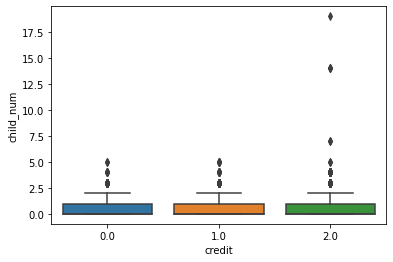

In [149]:
sns.boxplot(x='credit', y='child_num',
           data=train)

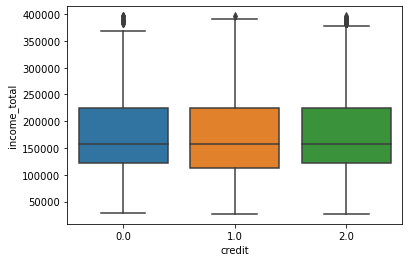

In [32]:
sns.boxplot(x='credit', y='income_total',
            data=train.loc[train['income_total'] < 0.4*1e6, :])

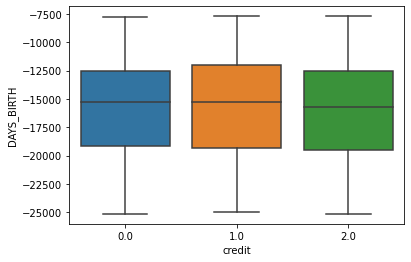

In [34]:
sns.boxplot(x='credit', y='DAYS_BIRTH',
            data=train)

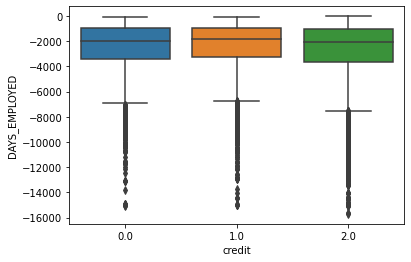

In [37]:
sns.boxplot(x='credit', y='DAYS_EMPLOYED',
            data=train.loc[train['DAYS_EMPLOYED'] < 0, :] )

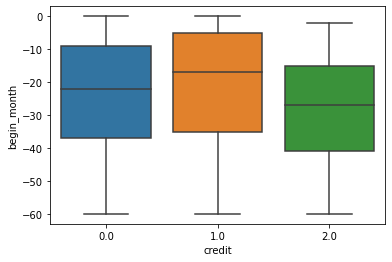

In [38]:
sns.boxplot(x='credit', y='begin_month',
            data=train )

In [150]:
train = train.loc[train['child_num'] < 10, :]

In [151]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [152]:
categoric_cols = ['gender','car','reality',
                 'income_type', 'edu_type', 'family_type',
                 'house_type', 'FLAG_MOBIL', 'work_phone',
                 'phone', 'email', 'occyp_type']
numeric_cols = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']

In [158]:
train_OH = pd.get_dummies(train, columns=categoric_cols, drop_first=True)
test_OH = pd.get_dummies(test, columns=categoric_cols, drop_first=True)

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_OH[numeric_cols])
train_OH_scaled = scaler.transform(train_OH[numeric_cols])
test_OH_scaled = scaler.transform(test_OH[numeric_cols])

In [160]:
train_final = train_OH.copy()
test_final = test_OH.copy()

train_final[numeric_cols] = train_OH_scaled
test_final[numeric_cols] = test_OH_scaled

In [178]:
train_final

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit,gender_M,car_Y,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_none
0,0,-0.591186,0.156350,-0.495717,1.062968,-0.219251,1.212203,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.786589,0.601656,-1.102109,-0.275762,0.891057,1.272701,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-0.591186,2.605532,0.717066,0.946796,-0.219251,0.244238,2.0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,3,-0.591186,0.156350,-0.235835,-0.042572,-0.219251,-0.663229,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,-0.591186,-0.288956,-0.235835,-0.037080,-0.219251,0.002247,2.0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,2.164365,0.379003,-0.928854,-0.088196,2.001365,1.454195,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
26453,26453,0.786589,-0.066303,-0.149208,0.119225,-0.219251,-1.268208,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
26454,26454,-0.591186,1.046962,-1.361991,-0.075100,-0.219251,0.062745,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
26455,26455,-0.591186,-0.155364,-1.361991,-0.881126,-1.329559,-1.994182,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

train_X = train_final.drop(labels=['credit', 'index'], axis=1)
train_y = train_final['credit']
test_X = test_final.drop(labels='index', axis=1)

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_val_losses = []
sub = np.zeros((test_X.shape[0], 3))

for n_fold, (train_index, val_index) in enumerate(folds.split(train_X, train_y)):
    X_train, X_val = train_X.iloc[train_index], train_X.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
                                                  
    model.fit(X_train, y_train)
    pred_prob = model.predict_proba(X_val)
    
    train_y_for_logloss = np.zeros((len(y_val), 3))
    for row_idx, target in enumerate(y_val):
        train_y_for_logloss[row_idx, int(target)] = 1
                                                  
    fold_val_loss = log_loss(train_y_for_logloss, pred_prob)
    fold_val_losses.append(fold_val_loss)
    print(f"FOLD {n_fold} : logloss = {fold_val_loss}")

    sub += model.predict_proba(test_X) / folds.n_splits

mean_fold_val_losses=np.mean(fold_val_losses)
print(f'Mean logloss = {mean_fold_val_losses}')

FOLD 0 : logloss = 0.8594990911416326
FOLD 1 : logloss = 0.8549743767972457
FOLD 2 : logloss = 0.8532603780877436
FOLD 3 : logloss = 0.8544368349629002
FOLD 4 : logloss = 0.8603117874453107
Mean logloss = 0.8564964936869666


In [189]:
# confusion matrix

pred = model.predict(X_val)
confusion_matrix(y_val, pred)

array([[   0,    6,  567],
       [   0,   17, 1121],
       [   0,    6, 3103]], dtype=int64)

거의 다 label=2 로 예측하는듯! imbalance로 접근해보자

이번에는 logistic에 있는 weight기능을 이용해보자
- 결론 : 너무 반대의 결과로 간다.

In [196]:
train_final['credit'].value_counts() / len(train_final)

2.0    0.644938
1.0    0.236183
0.0    0.118880
Name: credit, dtype: float64

In [219]:
weight = {0.0 : 2,
          1.0 : 1.8,
          2.0 : 1}

In [220]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=weight)

train_X = train_final.drop(labels=['credit', 'index'], axis=1)
train_y = train_final['credit']
test_X = test_final.drop(labels='index', axis=1)

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_val_losses = []
sub = np.zeros((test_X.shape[0], 3))

for n_fold, (train_index, val_index) in enumerate(folds.split(train_X, train_y)):
    X_train, X_val = train_X.iloc[train_index], train_X.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
                                                  
    model.fit(X_train, y_train)
    pred_prob = model.predict_proba(X_val)
    
    train_y_for_logloss = np.zeros((len(y_val), 3))
    for row_idx, target in enumerate(y_val):
        train_y_for_logloss[row_idx, int(target)] = 1
                                                  
    fold_val_loss = log_loss(train_y_for_logloss, pred_prob)
    fold_val_losses.append(fold_val_loss)
    print(f"FOLD {n_fold} : logloss = {fold_val_loss}")

    sub += model.predict_proba(test_X) / folds.n_splits

mean_fold_val_losses=np.mean(fold_val_losses)
print(f'Mean logloss = {mean_fold_val_losses}')

FOLD 0 : logloss = 0.9064267895037893
FOLD 1 : logloss = 0.8987001104783673
FOLD 2 : logloss = 0.8986104558006724
FOLD 3 : logloss = 0.9001652779121749
FOLD 4 : logloss = 0.905894222766759
Mean logloss = 0.9019593712923527


In [221]:
# confusion matrix

pred = model.predict(X_val)
confusion_matrix(y_val, pred)

array([[   0,  139,  434],
       [   0,  407,  731],
       [   1,  460, 2648]], dtype=int64)

In [225]:
submission[['0','1','2']] = sub

In [227]:
submission.to_csv('sub/Logistic_weight[2, 1.8, 1].csv', index=False)